In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor

In [2]:
# Load the dataset
# Assuming the dataset is uploaded to Kaggle or available locally
df = pd.read_excel('/kaggle/input/air-exposure/Air Exposure (Individual Response).xlsx')
df.head()

,Timestamp,Score,1. Gender:,2. Age:,3. Occupation:,4. Do you smoke?,"5. Do you have any lung diseases? (e.g., Asthma, Tuberculosis)",If Yes (Please specify the disease):,6. Which area do you live in inside Dhaka City?:,7. How many hours do you stay at home per day?,...,11. Does that place have air conditioning?,12. How many hours do you travel per day?,14. What is your primary mode of transport?,15. During what time do you usually travel?,16. How many days per week do you travel for work/school?,17. How do you perceive the air quality in your living area?,18. How do you perceive the air quality in your workplace?,19. Have you experienced any respiratory issues due to air pollution?,If Yes please specify:,20. Do you believe your profession increases your exposure to air pollution?
0,2025-02-28 15:56:59.729,0,Male,18 - 25,Student,No,No,NaN,Shahinbag,6 -12 hours,...,Partially Air-conditioned,1-3 hours,Private Car (AC),"Morning, Noon, Afternoon",5,Poor,Poor,Yes,"Stuffy nose, dust allergy",No
1,2025-03-01 12:18:56.963,0,Female,18 - 25,Student,No,No,NaN,Bashundhara,More than 12 hours,...,Partially Air-conditioned,Less than 1 hour,Rickshaw/ CNG,"Morning, Noon, Afternoon",4,Hazardous,Moderate,No,NaN,No
2,2025-03-01 12:45:52.269,0,Male,18 - 25,Student,Yes,No,NaN,Bashundhara,More than 12 hours,...,Fully Air-conditioned,1-3 hours,Walking/ Cycling,"Morning, Evening",6,Poor,Moderate,No,NaN,Unsure
3,2025-03-01 12:51:02.368,0,Male,18 - 25,Student,No,No,NaN,Shahbagh,6 -12 hours,...,Fully Air-conditioned,1-3 hours,Public Bus (Non-AC),Afternoon,5,Poor,Poor,No,NaN,No
4,2025-03-01 12:53:03.665,0,Male,18 - 25,Student,No,No,NaN,Bashundhara,6 -12 hours,...,Fully Air-conditioned,Less than 1 hour,Walking/ Cycling,Morning,5,Hazardous,Moderate,No,NaN,No


In [3]:
df.columns

Index(['Timestamp', 'Score', '1. Gender:  ', '2. Age:  ', '3. Occupation: ',
       '4. Do you smoke?',
       '5. Do you have any lung diseases? (e.g., Asthma, Tuberculosis)  ',
       'If Yes (Please specify the disease):',
       '6. Which area do you live in inside Dhaka City?:',
       '7. How many hours do you stay at home per day?  ',
       '8. What type of house do you live in?  ',
       '9. Specify the location or address you spend most time at- NOT your home (e.g. Workplace location, University name, Restaurant/Park locations, Outing places etc)',
       '10. How many hours do you spend there per day?',
       '11. Does that place have air conditioning?  ',
       '12. How many hours do you travel per day? ',
       '14. What is your primary mode of transport?  ',
       '15. During what time do you usually travel?  ',
       '16. How many days per week do you travel for work/school?  ',
       '17. How do you perceive the air quality in your living area?  ',
       '18. Ho

In [4]:
# Important columns for AQI calculation
columns_needed = [ 
    '6. Which area do you live in inside Dhaka City?:', 
    '7. How many hours do you stay at home per day?  ', 
    '8. What type of house do you live in?  ', 
    '9. Specify the location or address you spend most time at- NOT your home (e.g. Workplace location, University name, Restaurant/Park locations, Outing places etc)', 
    '10. How many hours do you spend there per day?', 
    '11. Does that place have air conditioning?  ', 
    '12. How many hours do you travel per day? ', 
    '14. What is your primary mode of transport?  '
]
df = df[columns_needed]

# Simplifying the column names
df.columns = [
    'Home_Location', 'T_home', 'F_home', 
    'Work_Location', 'T_work', 'F_work', 
    'T_travel', 'Transport_Mode'
]

df

,Home_Location,T_home,F_home,Work_Location,T_work,F_work,T_travel,Transport_Mode
0,Shahinbag,6 -12 hours,Partially Open (Do use AC when needed),Bashundhara,4 - 8 hours,Partially Air-conditioned,1-3 hours,Private Car (AC)
1,Bashundhara,More than 12 hours,Open House (No AC),Bashundhara,4 - 8 hours,Partially Air-conditioned,Less than 1 hour,Rickshaw/ CNG
2,Bashundhara,More than 12 hours,Open House (No AC),Bashundhara,4 - 8 hours,Fully Air-conditioned,1-3 hours,Walking/ Cycling
3,Shahbagh,6 -12 hours,Open House (No AC),Shahbagh,4 - 8 hours,Fully Air-conditioned,1-3 hours,Public Bus (Non-AC)
4,Bashundhara,6 -12 hours,Open House (No AC),Bashundhara,4 - 8 hours,Fully Air-conditioned,Less than 1 hour,Walking/ Cycling
...,...,...,...,...,...,...,...,...
141,Uttara,6 -12 hours,Partially Open (Do use AC when needed),Uttara,4 - 8 hours,Partially Air-conditioned,1-3 hours,Public Bus (Non-AC)
142,Dakshinkhan (Airport),6 -12 hours,Partially Open (Do use AC when needed),Uttara,4 - 8 hours,Partially Air-conditioned,1-3 hours,Public Bus (Non-AC)
143,Banani,Almost 24 hours,Partially Open (Do use AC when needed),Uttara,4 - 8 hours,Partially Air-conditioned,1-3 hours,Private Car (AC)
144,Badda,Less than 6 hours,Partially Open (Do use AC when needed),Uttara,Less than 4 hours,Fully Air-conditioned,1-3 hours,Motorcycle


In [5]:
# Display unique values in each column
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in Home_Location:
['Shahinbag' 'Bashundhara' 'Shahbagh' 'Basundhara' 'Uttara' 'Eskaton'
 'Bashundhara ' 'Mirpur Cantonment' 'Adabor' 'Savar' 'Bashudhara '
 'Farmgate ' 'Mohammadpur' 'Paltan' 'Jatrabari ' 'Kafrul' 'Kawlar Bazar'
 'Khilgaon' 'Mirpur ' 'Mogbazar' 'Lalmatia' 'Dhanmondi' 'Mirpur'
 'Gulshan-2' 'Motijheel' 'Rampura' 'Demra' 'Gulshan-1' 'Puran Dhaka'
 'Ramna' 'Shahinbhag' 'Baridhara' 'Banasree' 'New Market' 'Agargaon'
 'Jatrabari' 'Abdullahpur' 'Banani' 'Badda' 'Khilkhet' 'Wari'
 'Dakshinkhan (Airport)']


Unique values in T_home:
['6 -12 hours' 'More than 12 hours' 'Less than 6 hours' 'Almost 24 hours']


Unique values in F_home:
['Partially Open (Do use AC when needed)' 'Open House (No AC)'
 'Fully Closed House (Usage of AC all the time)']


Unique values in Work_Location:
['Bashundhara' 'Shahbagh' 'Basundhara' 'Paltan' 'Mirpur' 'Adabor'
 'Bashudhara ' 'Savar' 'Farmgate ' 'Mohammadpur' 'Motijheel'
 'Kawlar Bazar' 'Uttara' 'Mogbazar' 'Agargaon' 'Lalmatia' 'Dhanm

In [6]:
location_aqi = {
    'Agargaon': 218, 'Adabor': 240, 'Baridhara': 187, 'Banani': 220, 'Banasree': 117,
    'Bashundhara': 186, 'Baily Road': 240, 'Bangshal': 233, 'Dhanmondi': 143, 'Demra': 277,
    'Dhamrai': 287, 'Dakshinkhan (Airport)': 298, 'Elephant Road': 289, 'Eskaton': 301,
    'Gulshan-1': 283, 'Gulshan-2': 322, 'Gabtali': 311, 'Gulistan': 391, 'Hatirjheel': 175,
    'Hazaribagh': 351, 'Jatrabari': 309, 'Kadamtali': 322, 'Khilkhet': 289, 'Katabon': 366,
    'Kalabagan': 289, 'Khilgaon': 221, 'Kafrul': 278, 'Kawlar Bazar': 312, 'Keraniganj': 399,
    'Lalmatia': 286, 'Lalbagh': 265, 'Mirpur': 242, 'Mirpur Cantonment': 233, 'Mohammadpur': 230,
    'Mohakhali': 271, 'Motijheel': 155, 'Middle Badda': 276, 'North Badda': 278, 'Niketan': 260,
    'Nikunja': 254, 'New Market': 380, 'Puran Dhaka': 389, 'Paltan': 386, 'Paribagh': 340,
    'Polashi': 360, 'Pallabi': 256, 'Rayerbazar': 381, 'Rampura': 270, 'Ramna': 155,
    'Shyamoli': 250, 'Shahinbhag': 230, 'Shyampur': 256, 'Savar': 289, 'Shahbagh': 250,
    'Tejgaon': 240, 'Turag': 398, 'Uttara': 183, 'Wari': 260
}

# Handling Anomalies

In [7]:
# Create a fresh copy of the DataFrame to avoid any slicing issues
df_clean = df.copy()

# Remove spaces and correct spellings
df_clean['Home_Location'] = df_clean['Home_Location'].str.strip().replace({
    'Bashudhara': 'Bashundhara',
    'Basundhara': 'Bashundhara',
    'Shahinbag': 'Shahinbhag'
})
df_clean['Work_Location'] = df_clean['Work_Location'].str.strip().replace({
    'Bashudhara': 'Bashundhara',
    'Basundhara': 'Bashundhara',
    'Shahinbag': 'Shahinbhag'
})

# Check remaining unmapped locations
unmapped_home = df_clean[~df_clean['Home_Location'].isin(location_aqi.keys())]['Home_Location'].unique()
unmapped_work = df_clean[~df_clean['Work_Location'].isin(location_aqi.keys())]['Work_Location'].unique()
print("Remaining Unmapped Home Locations:", unmapped_home)
print("Remaining Unmapped Work Locations:", unmapped_work)

Remaining Unmapped Home Locations: ['Farmgate' 'Mogbazar' 'Abdullahpur' 'Badda']
Remaining Unmapped Work Locations: ['Farmgate' 'Mogbazar']


In [8]:
# Filter rows and create a new DataFrame
df_filtered = df_clean[df_clean['Home_Location'].isin(location_aqi.keys()) & 
                      df_clean['Work_Location'].isin(location_aqi.keys())].copy()
print(f"Rows after removing unmapped locations: {len(df_filtered)}")

Rows after removing unmapped locations: 139


# AQI Location Placement

In [9]:
# Map locations to AQI values using .loc
df_filtered.loc[:, 'AQI_home'] = df_filtered['Home_Location'].map(location_aqi)
df_filtered.loc[:, 'AQI_work'] = df_filtered['Work_Location'].map(location_aqi)

# Update original DataFrame if needed
df = df_filtered.copy()

# Display first few rows
df.head()

,Home_Location,T_home,F_home,Work_Location,T_work,F_work,T_travel,Transport_Mode,AQI_home,AQI_work
0,Shahinbhag,6 -12 hours,Partially Open (Do use AC when needed),Bashundhara,4 - 8 hours,Partially Air-conditioned,1-3 hours,Private Car (AC),230,186
1,Bashundhara,More than 12 hours,Open House (No AC),Bashundhara,4 - 8 hours,Partially Air-conditioned,Less than 1 hour,Rickshaw/ CNG,186,186
2,Bashundhara,More than 12 hours,Open House (No AC),Bashundhara,4 - 8 hours,Fully Air-conditioned,1-3 hours,Walking/ Cycling,186,186
3,Shahbagh,6 -12 hours,Open House (No AC),Shahbagh,4 - 8 hours,Fully Air-conditioned,1-3 hours,Public Bus (Non-AC),250,250
4,Bashundhara,6 -12 hours,Open House (No AC),Bashundhara,4 - 8 hours,Fully Air-conditioned,Less than 1 hour,Walking/ Cycling,186,186


In [10]:
print("Missing AQI values:")
print(df[['AQI_home', 'AQI_work']].isna().sum())

Missing AQI values:
AQI_home    0
AQI_work    0
dtype: int64


In [11]:
# Drop Home_Location and Work_Location columns
df = df.drop(['Home_Location', 'Work_Location'], axis=1)
df.head()

,T_home,F_home,T_work,F_work,T_travel,Transport_Mode,AQI_home,AQI_work
0,6 -12 hours,Partially Open (Do use AC when needed),4 - 8 hours,Partially Air-conditioned,1-3 hours,Private Car (AC),230,186
1,More than 12 hours,Open House (No AC),4 - 8 hours,Partially Air-conditioned,Less than 1 hour,Rickshaw/ CNG,186,186
2,More than 12 hours,Open House (No AC),4 - 8 hours,Fully Air-conditioned,1-3 hours,Walking/ Cycling,186,186
3,6 -12 hours,Open House (No AC),4 - 8 hours,Fully Air-conditioned,1-3 hours,Public Bus (Non-AC),250,250
4,6 -12 hours,Open House (No AC),4 - 8 hours,Fully Air-conditioned,Less than 1 hour,Walking/ Cycling,186,186


# Time Home, Work and Travel

In [12]:
# Define mappings for time columns based on the survey
hours_mapping = {
    # T_home
    'Less than 6 hours': 3,
    '6 -12 hours': 9,
    'More than 12 hours': 18,
    'Almost 24 hours': 24,
    # T_work
    'Less than 4 hours': 2,
    '4 - 8 hours': 6,
    '8 -12 hours': 10,
    'More than 12 hours': 18,
    # T_travel
    'Less than 1 hour': 0.5,
    '1-3 hours': 2,
    '4 - 6 hours': 5,
    '7 - 12 hours': 9.5,
    'More than 12 hours': 18
}

# Convert time columns to numerical values
df['T_home'] = df['T_home'].map(hours_mapping)
df['T_work'] = df['T_work'].map(hours_mapping)
df['T_travel'] = df['T_travel'].map(hours_mapping)

# Check for any unmapped time values
print("Unmapped T_home:", df['T_home'][df['T_home'].isna()].unique())
print("Unmapped T_work:", df['T_work'][df['T_work'].isna()].unique())
print("Unmapped T_travel:", df['T_travel'][df['T_travel'].isna()].unique())

df

Unmapped T_home: []
Unmapped T_work: []
Unmapped T_travel: []


,T_home,F_home,T_work,F_work,T_travel,Transport_Mode,AQI_home,AQI_work
0,9.0,Partially Open (Do use AC when needed),6.0,Partially Air-conditioned,2.0,Private Car (AC),230,186
1,18.0,Open House (No AC),6.0,Partially Air-conditioned,0.5,Rickshaw/ CNG,186,186
2,18.0,Open House (No AC),6.0,Fully Air-conditioned,2.0,Walking/ Cycling,186,186
3,9.0,Open House (No AC),6.0,Fully Air-conditioned,2.0,Public Bus (Non-AC),250,250
4,9.0,Open House (No AC),6.0,Fully Air-conditioned,0.5,Walking/ Cycling,186,186
...,...,...,...,...,...,...,...,...
140,9.0,Partially Open (Do use AC when needed),6.0,Fully Air-conditioned,2.0,Motorcycle,183,186
141,9.0,Partially Open (Do use AC when needed),6.0,Partially Air-conditioned,2.0,Public Bus (Non-AC),183,183
142,9.0,Partially Open (Do use AC when needed),6.0,Partially Air-conditioned,2.0,Public Bus (Non-AC),298,183
143,24.0,Partially Open (Do use AC when needed),6.0,Partially Air-conditioned,2.0,Private Car (AC),220,183


# Home and Work Factor

In [13]:
# Exposure factors for F_home (House_Type)
f_home_mapping = {
    'Fully Closed House (Usage of AC all the time)': 0.1,
    'Partially Open (Do use AC when needed)': 0.5,
    'Open House (No AC)': 1.0
}

# Exposure factors for F_work (Work_AC)
f_work_mapping = {
    'Fully Air-conditioned': 0.1,
    'Partially Air-conditioned': 0.5,
    'Fully Open place': 1.0
}

# Map exposure factors
df['F_home'] = df['F_home'].map(f_home_mapping)
df['F_work'] = df['F_work'].map(f_work_mapping)

# Check for unmapped factors
print("Unmapped F_home:", df['F_home'][df['F_home'].isna()].unique())
print("Unmapped F_work:", df['F_work'][df['F_work'].isna()].unique())

Unmapped F_home: []
Unmapped F_work: []


# Transport Exposure Factors

In [14]:
# Clean Transport_Mode: Fix 'Walking/rickshaw ' to 'Walking/Cycling'
df['Transport_Mode'] = df['Transport_Mode'].str.strip().replace('Walking/rickshaw', 'Walking/ Cycling')

transport_factor = {
    'Private Car (AC)': 0.1,
    'Public Bus (AC)': 0.2,
    'Metro Rail': 0.2,
    'Bus Rapid Transit': 0.3,
    'Private Car (No AC)': 0.5,
    'Rickshaw/ CNG': 0.7,
    'Motorcycle': 0.8,
    'Public Bus (Non-AC)': 0.9,
    'Walking/ Cycling': 1.0
}

# Map transport factors
df['Transport_factor'] = df['Transport_Mode'].map(transport_factor)

# Calculate AQI_travel as average of Home_Location_AQI and Work_Location_AQI, adjusted by transport factor
df['AQI_travel'] = ((df['AQI_home'] + df['AQI_work']) / 2) * df['Transport_factor']

# Check for unmapped transport factors
print("Unmapped Transport_Mode:", df['Transport_Mode'][df['Transport_factor'].isna()].unique())

df = df.drop(['Transport_Mode', 'Transport_factor'], axis=1)

df

Unmapped Transport_Mode: []


,T_home,F_home,T_work,F_work,T_travel,AQI_home,AQI_work,AQI_travel
0,9.0,0.5,6.0,0.5,2.0,230,186,20.80
1,18.0,1.0,6.0,0.5,0.5,186,186,130.20
2,18.0,1.0,6.0,0.1,2.0,186,186,186.00
3,9.0,1.0,6.0,0.1,2.0,250,250,225.00
4,9.0,1.0,6.0,0.1,0.5,186,186,186.00
...,...,...,...,...,...,...,...,...
140,9.0,0.5,6.0,0.1,2.0,183,186,147.60
141,9.0,0.5,6.0,0.5,2.0,183,183,164.70
142,9.0,0.5,6.0,0.5,2.0,298,183,216.45
143,24.0,0.5,6.0,0.5,2.0,220,183,20.15


# Calculating Average AQI (AQI_avg)

In [15]:
# Verify AQI_travel exists and has no missing values
print("Missing AQI_travel:", df['AQI_travel'].isna().sum())

# Calculate AQI_avg using the formula
df['AQI_avg'] = (((df['T_home'] * df['F_home'] * df['AQI_home']) +
                 (df['T_work'] * df['F_work'] * df['AQI_work']) +
                 (df['T_travel'] * df['AQI_travel'])) / \
                (df['T_home'] + df['T_work'] + df['T_travel'])).round(2)

df

Missing AQI_travel: 0


,T_home,F_home,T_work,F_work,T_travel,AQI_home,AQI_work,AQI_travel,AQI_avg
0,9.0,0.5,6.0,0.5,2.0,230,186,20.80,96.15
1,18.0,1.0,6.0,0.5,0.5,186,186,130.20,162.09
2,18.0,1.0,6.0,0.1,2.0,186,186,186.00,147.37
3,9.0,1.0,6.0,0.1,2.0,250,250,225.00,167.65
4,9.0,1.0,6.0,0.1,0.5,186,186,186.00,121.20
...,...,...,...,...,...,...,...,...,...
140,9.0,0.5,6.0,0.1,2.0,183,186,147.60,72.37
141,9.0,0.5,6.0,0.5,2.0,183,183,164.70,100.11
142,9.0,0.5,6.0,0.5,2.0,298,183,216.45,136.64
143,24.0,0.5,6.0,0.5,2.0,220,183,20.15,100.92


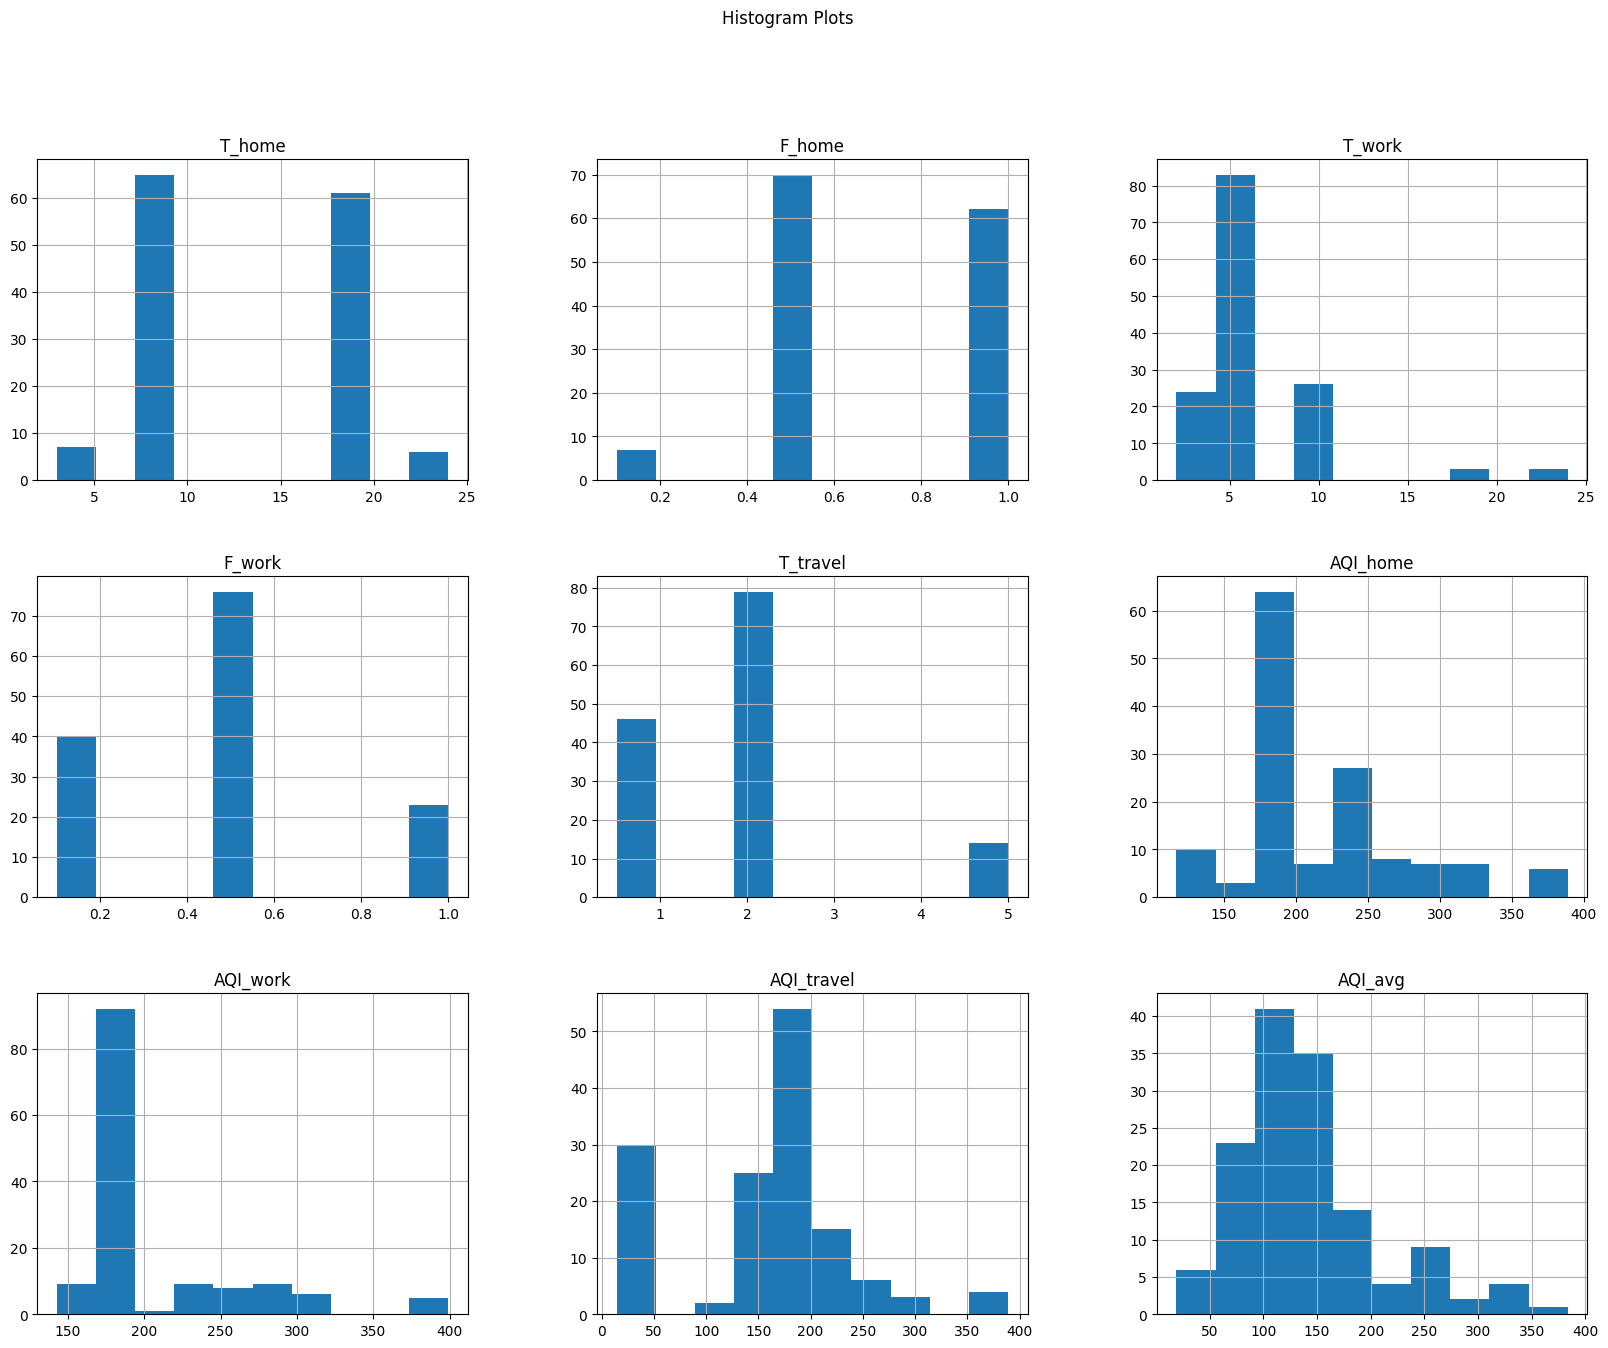

In [16]:
# Plot histograms for all numerical features
df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots")
plt.show()

# Splitting and Scaling

In [17]:
# Define features (X) and target (y)
X = df[['T_home', 'F_home', 'T_work', 'F_work', 'T_travel', 'AQI_home', 'AQI_work', 'AQI_travel']]
y = df['AQI_avg']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for consistency
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

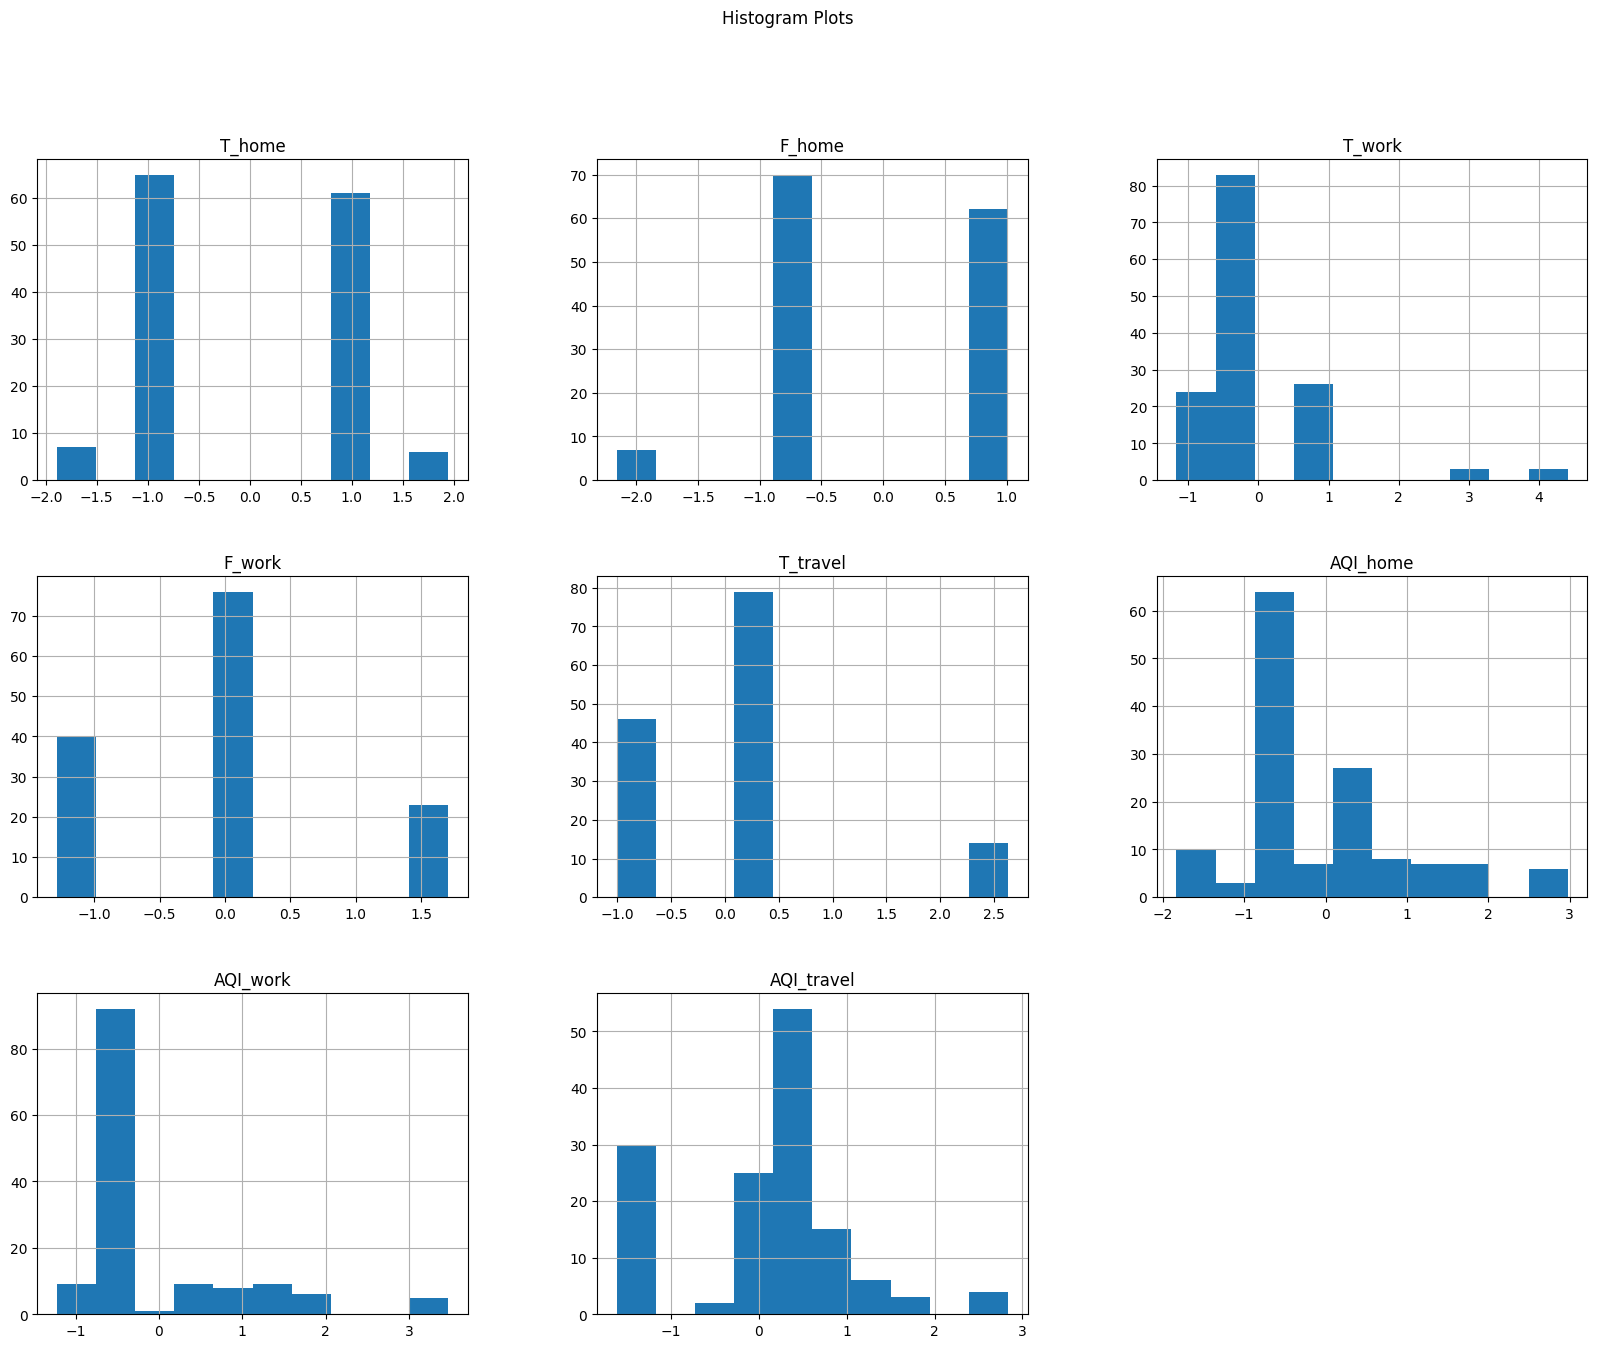

In [18]:
# Scaled training and testing data into a single DataFrame
scaled_df = pd.concat([X_train_scaled, X_test_scaled], axis=0)

# Plot histograms for all numerical features in the scaled dataset
scaled_df.hist(figsize=(20, 15))
plt.suptitle("Histogram Plots")
plt.show()

# Training the Models with Cross-Validation

In [19]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Dictionary to store predictions and cross-validation scores
predictions = {}
cv_scores = {}

# Train each model and compute cross-validation scores
for model_name, model in models.items():
    # Use scaled data for SVM, unscaled for others
    if model_name == 'Support Vector Machine':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Store predictions
    predictions[model_name] = y_pred
    
    # Compute 5-fold cross-validation scores
    if model_name == 'Support Vector Machine':
        cv_score = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='r2')
    else:
        cv_score = cross_val_score(model, X, y, cv=5, scoring='r2')
    
    cv_scores[model_name] = cv_score

# Display cross-validation scores
print("\nCross-Validation R² Scores (5-Fold):")
for model_name, scores in cv_scores.items():
    print(f"{model_name}: Mean R² = {scores.mean():.4f}, Std = {scores.std():.4f}")


Cross-Validation R² Scores (5-Fold):
Linear Regression: Mean R² = 0.9001, Std = 0.0632
Decision Tree: Mean R² = 0.7236, Std = 0.0981
Random Forest: Mean R² = 0.8322, Std = 0.0680
Support Vector Machine: Mean R² = -0.1688, Std = 0.3515


# Evaluate Model Performance

In [20]:
# Dictionary to store performance metrics
performance = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'R2 Score': []
}

# Evaluate each model
for model_name, model in models.items():
    y_pred = predictions[model_name]
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    performance['Model'].append(model_name)
    performance['MSE'].append(mse)
    performance['MAE'].append(mae)
    performance['R2 Score'].append(r2)

# Create a DataFrame to display the performance
performance_df = pd.DataFrame(performance)
print("\nBase Models Performance Comparison (Test Set):")
print(performance_df.to_string(index=False))


Base Models Performance Comparison (Test Set):
                 Model         MSE       MAE  R2 Score
     Linear Regression  116.473561  7.827668  0.964207
         Decision Tree  238.992271 10.532857  0.926556
         Random Forest  192.445784 10.006700  0.940860
Support Vector Machine 2727.054608 38.067392  0.161962


# Hyperparameter Tuning for Random Forest and SVM

In [21]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='r2')
rf_grid_search.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest R² Score (Cross-Validation):", rf_grid_search.best_score_)

# Update Random Forest predictions with the best model
best_rf = rf_grid_search.best_estimator_
predictions['Random Forest'] = best_rf.predict(X_test)

# Hyperparameter tuning for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear']
}
svm_grid_search = GridSearchCV(SVR(), svm_param_grid, cv=5, scoring='r2')
svm_grid_search.fit(X_train_scaled, y_train)
print("\nBest SVM Parameters:", svm_grid_search.best_params_)
print("Best SVM R² Score (Cross-Validation):", svm_grid_search.best_score_)

# Update SVM predictions with the best model
best_svm = svm_grid_search.best_estimator_
predictions['Support Vector Machine'] = best_svm.predict(X_test_scaled)

# Recompute performance metrics with updated predictions
performance = {'Model': [], 'MSE': [], 'MAE': [], 'R2 Score': []}
for model_name, model in models.items():
    y_pred = predictions[model_name]
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    performance['Model'].append(model_name)
    performance['MSE'].append(mse)
    performance['MAE'].append(mae)
    performance['R2 Score'].append(r2)

performance_df = pd.DataFrame(performance)
print("\nUpdated Performance Comparison (Test Set):")
print(performance_df.to_string(index=False))


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest R² Score (Cross-Validation): 0.861147576468516

Best SVM Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Best SVM R² Score (Cross-Validation): 0.9347403578442556

Updated Performance Comparison (Test Set):
                 Model        MSE       MAE  R2 Score
     Linear Regression 116.473561  7.827668  0.964207
         Decision Tree 238.992271 10.532857  0.926556
         Random Forest 192.445784 10.006700  0.940860
Support Vector Machine 119.970959  8.626063  0.963132


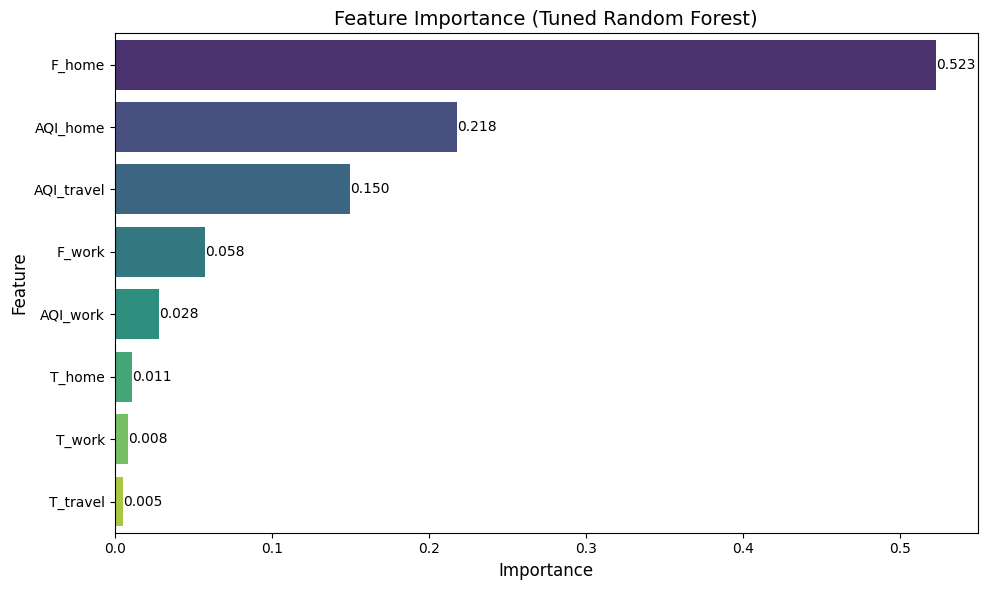

In [22]:
# Get the tuned Random Forest model from Cell 4
best_rf = rf_grid_search.best_estimator_

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Tuned Random Forest)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
for index, value in enumerate(feature_importance['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center', fontsize=10)
plt.tight_layout()
plt.savefig('feature_importance_rf_refined.png')

# Ensemble Models

In [23]:
# Initialize the individual models (using the best models from previous tuning)
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(**rf_grid_search.best_params_, random_state=42)
svm_model = SVR(**svm_grid_search.best_params_)

# Initialize ensemble models
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Voting Regressor (average predictions of individual models)
voting_model = VotingRegressor(estimators=[
    ('lr', lr_model),
    ('rf', rf_model),
    ('svm', svm_model)
])

# Stacking Regressor (combine models with a meta-model)
stacking_model = StackingRegressor(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('svm', svm_model)
    ],
    final_estimator=LinearRegression()
)

# Dictionary of all models (individual + ensemble)
all_models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Support Vector Machine': svm_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'Voting Regressor': voting_model,
    'Stacking Regressor': stacking_model
}

# Dictionary to store predictions
predictions = {}

# Train and evaluate each model
performance = {'Model': [], 'MSE': [], 'MAE': [], 'R2 Score': []}
for model_name, model in all_models.items():
    # Use scaled data for SVM and ensemble models that include SVM
    if 'Support Vector Machine' in model_name or 'Voting' in model_name or 'Stacking' in model_name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Store predictions
    predictions[model_name] = y_pred
    
    # Compute performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    performance['Model'].append(model_name)
    performance['MSE'].append(mse)
    performance['MAE'].append(mae)
    performance['R2 Score'].append(r2)

In [24]:
# Create a DataFrame to display the performance
performance_df = pd.DataFrame(performance)
print("\nPerformance Comparison (Individual + Ensemble Models):")
print(performance_df.to_string(index=False))

# Rank models by MSE (ascending - lower is better)
print("\nRanked by MSE (Lower is Better):")
mse_ranked = performance_df.sort_values(by='MSE', ascending=True)
print(mse_ranked[['Model', 'MSE']].to_string(index=False))

# Rank models by MAE (ascending - lower is better)
print("\nRanked by MAE (Lower is Better):")
mae_ranked = performance_df.sort_values(by='MAE', ascending=True)
print(mae_ranked[['Model', 'MAE']].to_string(index=False))

# Rank models by R² Score (descending - higher is better)
print("\nRanked by R² Score (Higher is Better):")
r2_ranked = performance_df.sort_values(by='R2 Score', ascending=False)
print(r2_ranked[['Model', 'R2 Score']].to_string(index=False))


Performance Comparison (Individual + Ensemble Models):
                 Model        MSE       MAE  R2 Score
     Linear Regression 116.473561  7.827668  0.964207
         Decision Tree 238.992271 10.532857  0.926556
         Random Forest 192.445784 10.006700  0.940860
Support Vector Machine 119.970959  8.626063  0.963132
     Gradient Boosting 107.793946  7.009429  0.966874
               XGBoost 115.418297  6.709357  0.964531
      Voting Regressor  77.309835  6.584390  0.976242
    Stacking Regressor 101.527302  7.943170  0.968800

Ranked by MSE (Lower is Better):
                 Model        MSE
      Voting Regressor  77.309835
    Stacking Regressor 101.527302
     Gradient Boosting 107.793946
               XGBoost 115.418297
     Linear Regression 116.473561
Support Vector Machine 119.970959
         Random Forest 192.445784
         Decision Tree 238.992271

Ranked by MAE (Lower is Better):
                 Model       MAE
      Voting Regressor  6.584390
               XGB

# Line Plot for Overall Comparison (Scaled Metrics)

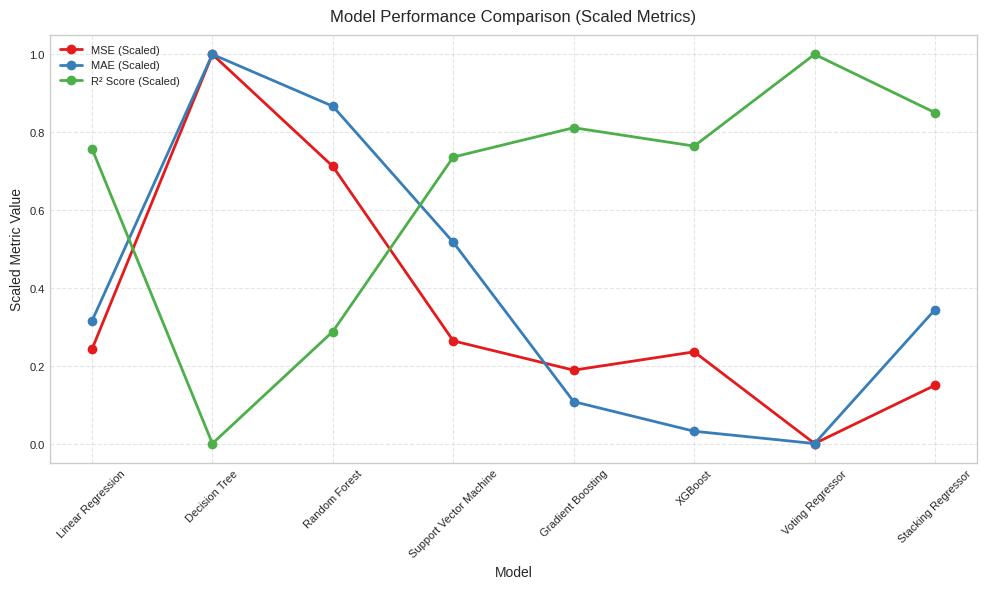

In [25]:
# Scale the metrics to a common range for better comparison in a single plot
performance_df_scaled = performance_df.copy()
performance_df_scaled['MSE'] = (performance_df['MSE'] - performance_df['MSE'].min()) / (performance_df['MSE'].max() - performance_df['MSE'].min())
performance_df_scaled['MAE'] = (performance_df['MAE'] - performance_df['MAE'].min()) / (performance_df['MAE'].max() - performance_df['MAE'].min())
performance_df_scaled['R2 Score'] = (performance_df['R2 Score'] - performance_df['R2 Score'].min()) / (performance_df['R2 Score'].max() - performance_df['R2 Score'].min())

# Clean style
plt.style.use('seaborn-v0_8-whitegrid')

# Use a colorful palette for the lines
colors = sns.color_palette("Set1", n_colors=3)  # Vibrant, distinct colors

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(performance_df_scaled['Model'], performance_df_scaled['MSE'], marker='o', label='MSE (Scaled)', color=colors[0], linewidth=2)
plt.plot(performance_df_scaled['Model'], performance_df_scaled['MAE'], marker='o', label='MAE (Scaled)', color=colors[1], linewidth=2)
plt.plot(performance_df_scaled['Model'], performance_df_scaled['R2 Score'], marker='o', label='R² Score (Scaled)', color=colors[2], linewidth=2)
plt.title('Model Performance Comparison (Scaled Metrics)', fontsize=12, pad=10)
plt.xlabel('Model', fontsize=10)
plt.ylabel('Scaled Metric Value', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('overall_comparison_line_colorful.png')